In [1]:
f = lambda x: np.exp(2 * x) + x
df = lambda x: 2 * np.exp(2 * x) + 1

#метод дихотомии
def dichotomy(loc, iternum):
    x_0, x_1 = loc[0], loc[1]
    x_2 = (x_0 + x_1)/2.
    eps = [abs(f(x_2))]
    for i in range(1, iternum):
        if f(x_0)*f(x_2) <= 0:
            x_1 = x_2
        else:
            x_0 = x_2
            
        x_2 = (x_0 + x_1)/2.
        eps.append(abs(f(x_2)))
    return np.array(eps)

#метод хорд
def chords(loc, iternum):
    x_0, x_1 = loc[0], loc[1]
    x_2 = x_0 - f(x_0) * (x_1 - x_0) / (f(x_1) - f(x_0))
    eps = [abs(f(x_2))]
    for i in range(1, iternum):
        if f(x_0)*f(x_2) <= 0:
            x_1 = x_2
        else:
            x_0 = x_2
            
        x_2 = x_0 - f(x_0) * (x_1 - x_0) / (f(x_1) - f(x_0))
        eps.append(abs(f(x_2)))
    return np.array(eps)

#метод Ньютона
def newton(x_0, iternum):
    x_1 = x_0
    eps = [abs(f(x_1))]
    for i in range(1, iternum):
        x_1 = x_1-f(x_1)/df(x_1)
        eps.append(abs(f(x_1)))
    return np.array(eps)

#метод секущих
def secants(loc, iternum):
    x_0, x_1 = loc[0], loc[1]
    x_2 = x_1 - (x_1 - x_0) * f(x_1) / (f(x_1) - f(x_0))
    eps = [abs(f(x_2))]
    for i in range(1, iternum):
        x_1 = x_2
        x_2 = x_1 - (x_1 - x_0) * f(x_1) / (f(x_1) - f(x_0))
        eps.append(abs(f(x_2)))
    return np.array(eps)

#метод простых итераций c x_1 = -e^(2x_0)
def simple(x_0, iternum):
    x_1 = x_0
    eps = [abs(f(x_1))]
    for i in range(1, iternum):
        x_1 = -np.exp(2 * x_1)
        eps.append(abs(f(x_1)))
    return np.array(eps)


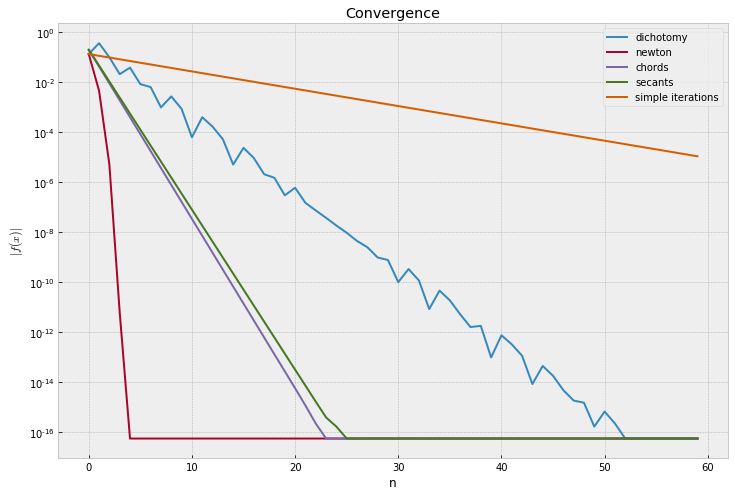

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use(['bmh'])
plt.figure(figsize=(12,8))

plt.xlabel('n')
plt.ylabel(r'$|f(x)|$')
plt.title('Convergence')
iternum = 60
loc = [-1, 0]
n = np.arange(0, iternum, 1)

plt.plot(n, dichotomy(loc,iternum), label='dichotomy')
plt.plot(n, newton(-0.5, iternum), label='newton')
plt.plot(n, chords(loc,iternum), label='chords')
plt.plot(n, secants(loc,iternum), label='secants')
plt.plot(n, simple(-0.5, iternum), label='simple iterations')
plt.yscale('log')
plt.legend(loc=1)

#plt.savefig('big.eps', format='eps')

plt.show()